In [97]:
import numpy as np
import pandas as pd
import os, math
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display # to display images


In [2]:
# Load entire dataset
# data = np.load('./task1/task1_X_train.npy', mmap_mode = 'r')
#path = 'task1/splices'
#chunks = 256
#chunk_size = data.shape[0] // chunks
#for i in range(chunks):
#    print("Saving chunk ", i)
#    if i == chunks-1:
#        subset = data[i * chunk_size:]
#    else: 
#        subset = data[i * chunk_size: (i+1)*chunk_size ]
#    np.save(f"{path}/{i}_y.npy", subset)
# data

NameError: name 'data' is not defined

In [44]:
# Load subsection of dataset
X = np.load('task1/splices/0.npy')
y = np.load('task1/splices/0_y.npy')
num_examples = X.shape[0]
split = 0.8
boundary = math.floor(num_examples * split)
X_train = X[:boundary]
X_test = X[boundary :]
y_train = y[boundary :]
y_test = y[:boundary]

In [98]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75, 224, 224, 3), (19, 3), (19, 224, 224, 3), (75, 3))

In [99]:
# inspect the dataset
print('total pixel in 0 ' + str(np.absolute(np.min(X_train[:,:,:,0])) + np.max(X_train[:,:,:,0])) 
      + ', min is ' + str(np.min(X_train[:,:,:,0])) + ', max is ' + str(np.max(X_train[:,:,:,0]))
     + ', mean is ' + str(np.mean(X_train[:,:,:,0])))
print('total pixel in 1 ' + str(np.absolute(np.min(X_train[:,:,:,1])) + np.max(X_train[:,:,:,1])) 
      + ', min is ' + str(np.min(X_train[:,:,:,1])) + ', max is ' + str(np.max(X_train[:,:,:,1]))
     + ', mean is ' + str(np.mean(X_train[:,:,:,1])))
print('total pixel in 2 ' + str(np.absolute(np.min(X_train[:,:,:,2])) + np.max(X_train[:,:,:,2])) 
      + ', min is ' + str(np.min(X_train[:,:,:,2])) + ', max is ' + str(np.max(X_train[:,:,:,2]))
     + ', mean is ' + str(np.mean(X_train[:,:,:,2])))

total pixel in 0 255.0, min is -103.939, max is 151.061, mean is 9.568764
total pixel in 1 255.0, min is -116.779, max is 138.22101, mean is 4.8707457
total pixel in 2 255.0, min is -123.68, max is 131.32, mean is 4.826242


-103.939
5.0
241.0


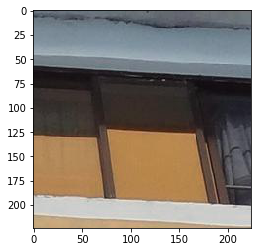

In [100]:
# plot random pic
index = 9
example = X_train[index]
x = originalPic(example)
plt.imshow((x).astype(np.uint8), interpolation='nearest')
plt.show()
#print ("y = " + str(y_train[index]))

In [8]:
def originalPic(z):
    z[:,:,0] += np.absolute(np.min(X_train[:,:,:,0]))
    print(np.min(X_train[:,:,:,0]))
    print(np.min(z[:,:,0]))
    print(np.max(z[:,:,0]))
    z[:,:,1] += np.absolute(np.min(X_train[:,:,:,1]))
    z[:,:,2] += np.absolute(np.min(X_train[:,:,:,2]))
    return z

In [23]:
print(X.shape)
print(y.shape)
img0 = X[0, :, :, :]
print(img0.shape)
print(np.abs(np.min(img0[:, :, 0])) + np.abs(np.max(img0[:, :, 0])))
print(np.abs(np.min(img0[:, :, 1])) + np.abs(np.max(img0[:, :, 1])))
print(np.abs(np.min(img0[:, :, 2])) + np.abs(np.max(img0[:, :, 2])))

(94, 224, 224, 3)
(94, 3)
(224, 224, 3)
255.0
251.0
253.0


In [88]:
# Description:
#    Given a (w, h, c) sized matrix, recenter each color channel of the image. This is only to be
#    used to preprocess our train/test data because their colors are weirdly centered.
# Inputs:
#    image = image to be recentered
# Important note:
#    This function modifies the input! Please provide a copy of the matrix you are working
#    with! (Ex: call recenter(np.ndarray.copy(image)) instead of recenter(image)).
def recenter(image):
    image[:, :, 0] -= np.min(image[:, :, 0])
    image[:, :, 1] -= np.min(image[:, :, 1])
    image[:, :, 2] -= np.min(image[:, :, 2])

In [91]:
# Description:
#    Given an (m, w, h, c) sized matrix where m represents how many images there are,
#    return a flattened (w*h*c, m) sized matrix whose values are normalized to be
#    be between 0 and 1.
# Inputs:
#    X = matrix to be recentered, normalized, and flattened
# Important note:
#    This function modifies the input! Please provide a copy of the matrix you are working
#    with! (Ex: call recenter_normalize_and_flatten(np.ndarray.copy(X)) instead of 
#    recenter_normalize_and_flatten(X)).
def recenter_normalize_and_flatten(X):
    m, _, _, _ = X.shape
    for i in range(m):
        recenter(X[i, :, :, :])
    X /= 255
    return X.reshape(m, -1).T

In [92]:
X_flat = recenter_normalize_and_flatten(np.ndarray.copy(X_train))
print(X_flat.shape)
# plt.imshow((X_copy[10, :, :, :]).astype(np.uint8), interpolation='nearest')
# plt.show()

(150528, 75)


In [93]:
print(np.max(X_flat))
print(np.min(X_flat))

1.0
0.0


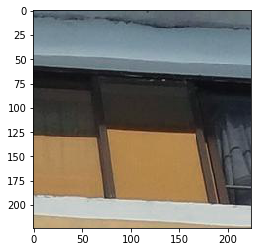

In [94]:
index = 9
im = np.ndarray.copy(X_train[index, :, :, :])
recenter(im)
plt.imshow((im).astype(np.uint8), interpolation='nearest')
plt.show()

In [95]:
# Description:
#    Given an (n, m) sized matrix X where each column represents a training example,
#    pick a random subset of columns to be designated as training data and the rest
#    to be designated as test (dev) data.
# Inputs:
#    X = matrix to be split into train/test
#    train_ratio = proportion of examples to be designated as training data
def split_train_test(X, train_ratio):
    n, m = X.shape
    num_train = np.floor(m*train_ratio)
    num_test = m - num_train
    train_indices = []
    test_indices = []
    r = np.random.rand(m)
    for i in range(m):
        if r[i] < num_train/(num_train + num_test):
            train_indices.append(i)
            num_train -= 1
        else:
            test_indices.append(i)
            num_test -= 1
    X_train = X[:, train_indices]
    X_test = X[:, test_indices]
    return X_train, X_test

In [96]:
X_flat_train, X_flat_test = split_train_test(X_flat, 0.8)
print(X_flat_train.shape)
print(X_flat_test.shape)

(150528, 60)
(150528, 15)
